# Hasnah Said
# A4: Common Analysis
# November 4, 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 0: Data acquisition

In the first part of this project, we are trying to answer the following question for the county that we were assigned to: <br>
**How did masking policies change the progression of confirmed COVID-19 cases from February 1, 2020 through October 15, 2021?**<br>

**My county:** <br>
hasna024 | Said	Hasnah | 7| 54 | Fairfield | Connecticut | 1,618.46|624.89 | 957,419 | 40,590 | Bridgeport<br>

In [2]:
mask_mandate = pd.read_csv('raw_data/mask_mandates_by_county.csv')
mask_use = pd.read_csv('raw_data/mask_use_by_county.csv')
us_confirmed_cases = pd.read_csv('raw_data/RAW_us_confirmed_cases.csv')

### Step 1: Analyze

The common question that you are to answer is:<br>
**How did masking policies change the progression of confirmed COVID-19 cases from February 1, 2020 through October 15, 2021?**<br>


To answer the question, the first thing I will do is extract the information relevent to my county from the three datasets. I was assigned Fairfield, Connecticut. I did the following to process the data and prepare them to plot the time series: 
* Filter out Fairfield data
* Drop unneeded columns in the confirmed cases
* Transpose the cases dataframe
* Rename columns and add a FIPS column
* Merge the cases dataframe with the mask use data frame on FIPS
* Drop unneded columns in mandate mask dataframe
* Convert date columns to datetime type
* Merge the mandage mask with other two data frame on date
* Calculate the number of daily new cases
* Add a column for the population
* Calculate the the rate of infection using the formula I found in the link shared on Slack(https://towardsdatascience.com/wide-to-long-data-how-and-when-to-use-pandas-melt-stack-and-wide-to-long-7c1e0f462a98): <br><br><center> Rate of Infection = $\frac{Number of Infections}{Population at Risk}$<br><br> I will define Population at Risk = county population - confirmed cases<br>

In [9]:
# Filter out Fairfield data 
fairfield_cases_df = us_confirmed_cases.loc[(us_confirmed_cases['Admin2'] == 'Fairfield') & (us_confirmed_cases['Province_State'] == 'Connecticut')]
fairfield_fips = fairfield_cases_df['FIPS'].item()
fairfield_mask_df = mask_use.loc[mask_use['COUNTYFP'] == fairfield_fips]
fairfield_mandate_df = mask_mandate[(mask_mandate['State_Tribe_Territory'] == 'CT') & (mask_mandate['County_Name'] == 'Fairfield County')]

In [10]:
# Drop columns that are not needed
fairfield_cases_df = fairfield_cases_df.drop(['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)

In [11]:
# Transpose the dates and number of cases
fairfield_cases_df['id'] = fairfield_cases_df.index
fairfield_cases_df.set_index('id',inplace=True)

In [12]:
fairfield_cases_df = fairfield_cases_df.T

In [13]:
fairfield_cases_df = fairfield_cases_df.rename(columns={323: 'cases'})
fairfield_cases_df['date'] = fairfield_cases_df.index

In [15]:
fairfield_cases_df['date'] = pd.to_datetime(fairfield_cases_df['date'])
fairfield_cases_df

id,cases,date,FIPS
1/22/20,0,2020-01-22,9001.0
1/23/20,0,2020-01-23,9001.0
1/24/20,0,2020-01-24,9001.0
1/25/20,0,2020-01-25,9001.0
1/26/20,0,2020-01-26,9001.0
...,...,...,...
10/27/21,112387,2021-10-27,9001.0
10/28/21,112494,2021-10-28,9001.0
10/29/21,112576,2021-10-29,9001.0
10/30/21,112576,2021-10-30,9001.0


In [16]:
# Merge confirmed cases and mask use dataframes
merged_df = fairfield_cases_df.merge(fairfield_mask_df, how='left', left_on='FIPS', right_on='COUNTYFP')

In [17]:
# Convert date column to datetime type to merge
fairfield_mandate_df['date'] = pd.to_datetime(fairfield_mandate_df['date'])

<ipython-input-17-4cb708cce8e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fairfield_mandate_df['date'] = pd.to_datetime(fairfield_mandate_df['date'])


In [18]:
# Drop columns not needed for visualization
fairfield_mandate_df = fairfield_mandate_df.drop(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County'], axis=1)

In [19]:
# Merge mask mandate with other two dataframes
merged_df = merged_df.merge(fairfield_mandate_df, how='left', on='date').drop(['COUNTYFP'], axis =1)

In [20]:
merged_df

,cases,date,FIPS,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,0,2020-01-22,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
1,0,2020-01-23,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
2,0,2020-01-24,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
3,0,2020-01-25,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
4,0,2020-01-26,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,112387,2021-10-27,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
645,112494,2021-10-28,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
646,112576,2021-10-29,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
647,112576,2021-10-30,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN


In [21]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [22]:
# Filter out dates outsided the range 
mask = (merged_df['date'] >= '2020-02-01') & (merged_df['date'] <= '2021-10-15')
merged_df = merged_df.loc[mask]

In [23]:
merged_df

,cases,date,FIPS,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
10,0,2020-02-01,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
11,0,2020-02-02,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
12,0,2020-02-03,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
13,0,2020-02-04,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
14,0,2020-02-05,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,111001,2021-10-11,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
629,111333,2021-10-12,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
630,111386,2021-10-13,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN
631,111545,2021-10-14,9001.0,0.027,0.019,0.06,0.114,0.78,NaN,NaN,NaN,NaN,NaN


In [24]:
# Calculate the daily new covid cases
merged_df['daily_new_cases'] = merged_df['cases'].diff()

<ipython-input-24-d003fc26dfd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['daily_new_cases'] = merged_df['cases'].diff()


In [25]:
# Calculate the rate of infection
merged_df['Population'] = 957419
merged_df['Population_at_Risk'] = merged_df['Population'] - merged_df['cases'] 
merged_df['Rate_of_infection'] = merged_df['cases'] / merged_df['Population_at_Risk']

<ipython-input-25-e6154d2cfee4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Population'] = 957419
<ipython-input-25-e6154d2cfee4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Population_at_Risk'] = merged_df['Population'] - merged_df['cases']
<ipython-input-25-e6154d2cfee4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [26]:
merged_df.columns

Index(['cases', 'date', 'FIPS', 'NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY',
       'ALWAYS', 'order_code', 'Face_Masks_Required_in_Public',
       'Source_of_Action', 'URL', 'Citation', 'daily_new_cases', 'Population',
       'Population_at_Risk', 'Rate_of_infection'],
      dtype='object')

In [ ]:
merged_df.to_csv('clean_data/Fairfield_Cases_Masks.csv')

### Step 2: Visualize

The visualization I created shows the number of new cases daily. I marked the period of time where masking mandate policies were in effect in orange. The second visualization shows the rate of infection over the same period of time.

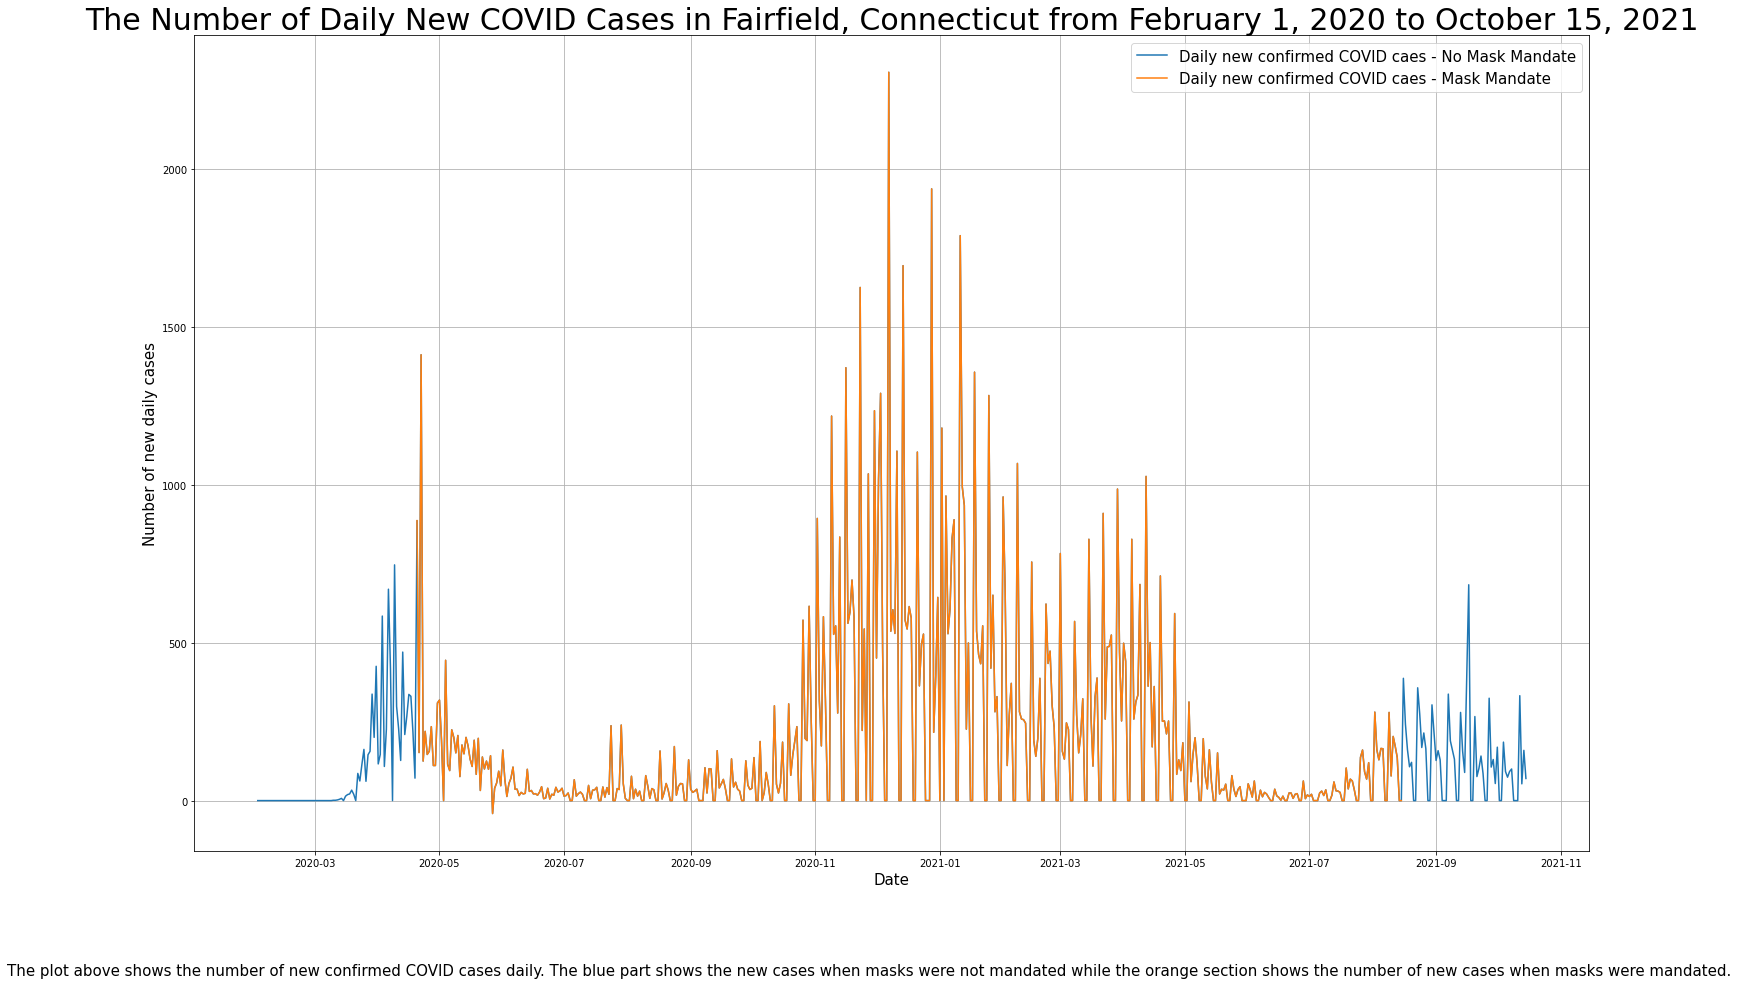

In [33]:
fig = plt.figure(figsize = (25, 15))

plt.plot(merged_df['date'], merged_df['daily_new_cases'], 
        label='Daily new confirmed COVID caes - No Mask Mandate')

plt.plot(merged_df.loc[merged_df['Face_Masks_Required_in_Public'] == 'Yes', 'date'], 
         merged_df.loc[merged_df['Face_Masks_Required_in_Public'] == 'Yes', 'daily_new_cases'], 
         label='Daily new confirmed COVID caes - Mask Mandate')
plt.grid()


plt.ylabel('Number of new daily cases', fontsize=15)
plt.xlabel('Date', fontsize=15)

plt.title('The Number of Daily New COVID Cases in Fairfield, Connecticut from February 1, 2020 to October 15, 2021', fontsize=30)
plt.legend(fontsize=15)

txt="The plot above shows the number of new confirmed COVID cases daily. The blue part shows the new cases when masks were not mandated while the orange section shows the number of new cases when masks were mandated."
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=15)
plt.savefig('fairfield_daily_case_increase.png')

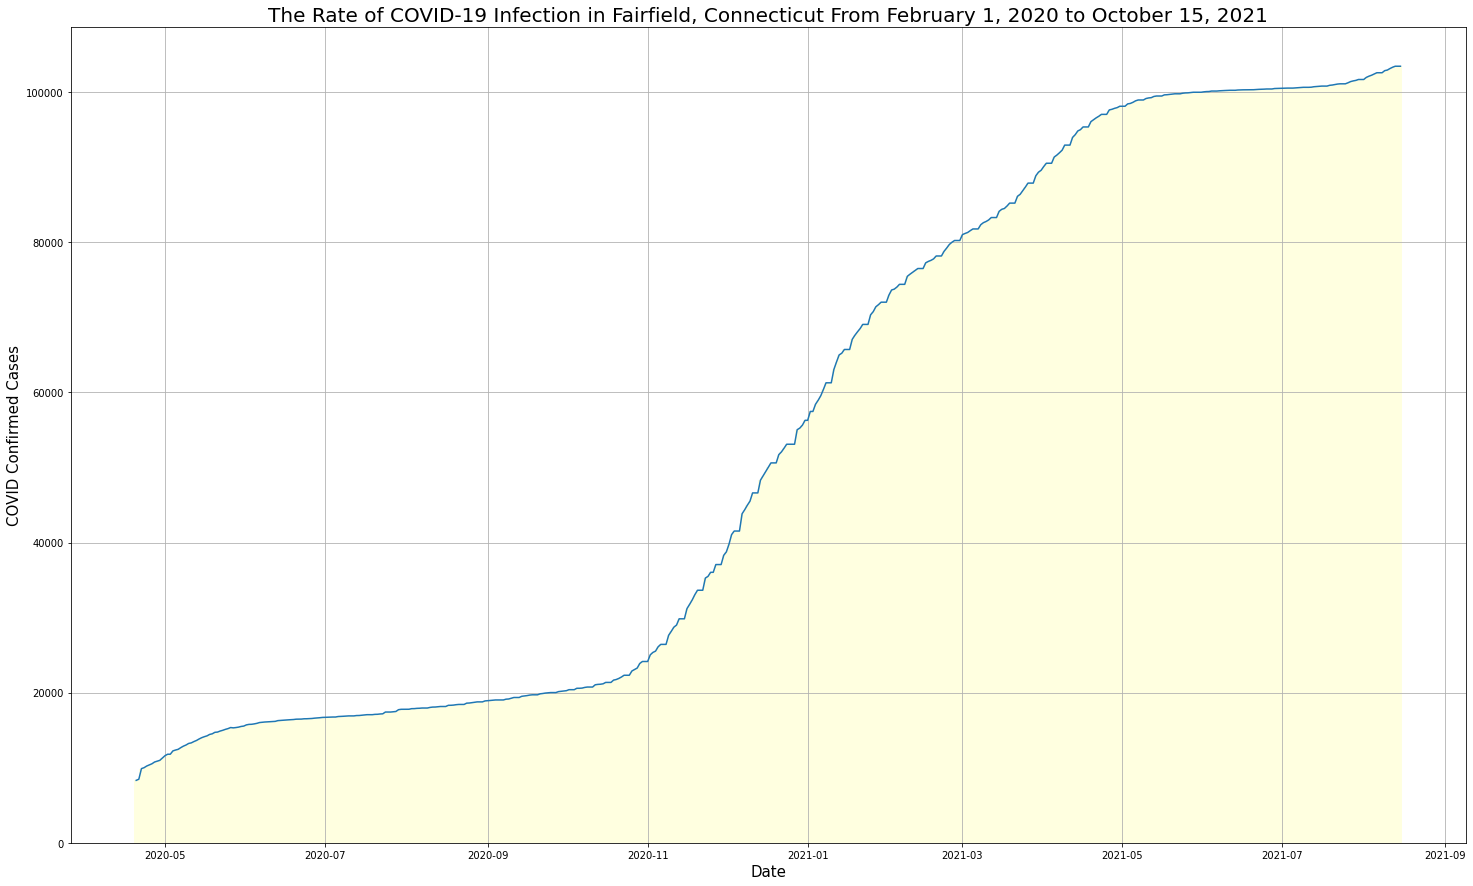

In [34]:
fig = plt.figure(figsize = (25, 15))


plt.plot(merged_df.loc[merged_df['Face_Masks_Required_in_Public'] == 'Yes', 'date'], 
         merged_df.loc[merged_df['Face_Masks_Required_in_Public'] == 'Yes', 'cases'])

plt.bar(merged_df.loc[merged_df['Face_Masks_Required_in_Public'] == 'Yes', 'date'], 
         merged_df.loc[merged_df['Face_Masks_Required_in_Public'] == 'Yes', 'cases'], 
         color= 'lightyellow', width = 1.5)

plt.grid()
plt.ylabel('COVID Confirmed Cases', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
plt.title('The Rate of COVID-19 Infection in Fairfield, Connecticut From February 1, 2020 to October 15, 2021', fontsize=20)
plt.savefig('fairfield_rate_of_infection.png')


### Step 3: Write & Reflect